# Лабораторная работа 11. Алгоритмы на графах. Сделано Олежкой

In [1]:
import networkx as nx
import pylab
import matplotlib.pyplot as plt

Пусть задан грав множеством смежности:

In [86]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

Создадим соответствующий направленный граф (https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html)

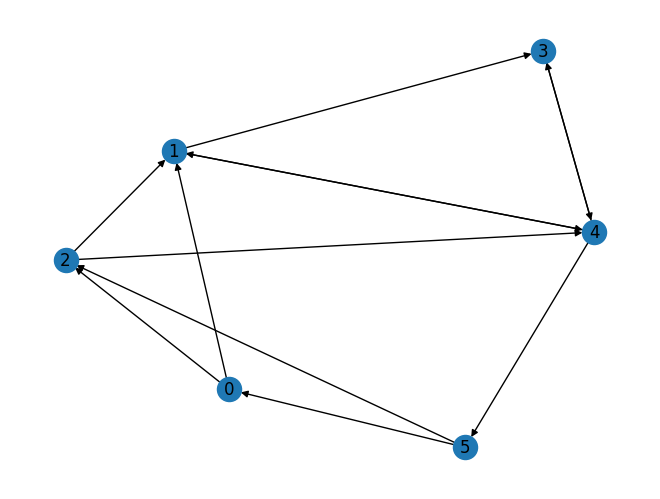

<Figure size 640x480 with 0 Axes>

In [87]:
N = len(pos)
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G,with_labels=True)

pylab.figure ()
plt.show()

# 1. Алгоритмы обхода графа.

Во многих приложениях нужно уметь выписывать все вершины графа по одному разу, начиная с некоторой. Это делается с помощью обходов в глубину или в ширину.

Основная идея обходов:

- на каждом шаге рассмотреть очередную необработанную вершину;
- пометить эту вершину некоторым образом;
- до/после обработки данной вершины осуществить обход из всех нерассмотренных соседей.

Для упорядочивания вершин используется очередь (обход в ширину) или стек (обход в глубину).

# 1.1. Поиск в ширину.

Код программы реализующий поиск в ширину (с записью предшественников):

In [88]:
def bfs(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0                          # уровень начальной вершины
    queue = [s]                           # добавляем начальную вершину в очередь
    while queue:                          # пока там что-то есть
        v = queue.pop(0)                  # извлекаем вершину
        for w in graph[v]:                # запускаем обход из вершины v
            if level[w] is None:          # проверка на посещенность
                queue.append(w)           # добавление вершины в очередь
                parents[w] = v
                level[w] = level[v] + 1   # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level, parents

И программы востанавливающий маршрут:

In [89]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

# 1.2. Поиск в глубину.

Код программы реализующий поиск в ширину (с записью предшественников):

In [5]:
def dfs(graph, s, out=0):
    level = {v: None for v in graph}   
    level[s] = 0                                # уровень начальной вершины
    queue = [s]                                 # добавляем начальную вершину в очередь
    while queue:                                # пока там что-то есть
        v = queue.pop(-1)                       # извлекаем вершину
        for w in graph[v]:                      # запускаем обход из вершины v
            if level[w] is None:                # проверка на посещенность
                queue.append(w)                 # добавление вершины в очередь
                level[w] = level[v] + 1         # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level

In [6]:
dfs(pos, 0, 1)

1 {0: 0, 1: 1, 2: 1, 3: None, 4: None, 5: None} [1, 2]
2 {0: 0, 1: 1, 2: 1, 3: None, 4: 2, 5: None} [1, 4]
3 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3, 5]
1 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} []


{0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3}

In [7]:
pos[2]

{1, 4}

# Пример 1.

Определим с помощью поиска в ширину кратчайший маршрут:

In [91]:
level, parents = bfs(pos, 0, out=1)

1 {0: 0, 1: 1, 2: 1, 3: None, 4: None, 5: None} [1, 2]
2 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: None} [2, 3, 4]
2 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: None} [3, 4]
2 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: None} [4]
3 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3} [5]
1 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3} []


In [9]:
level

{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3}

In [10]:
parents

{0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}

In [11]:
path = PATH(5, parents)
print(path)

[0, 1, 4, 5]


Визуализируем этот маршрут:

c:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


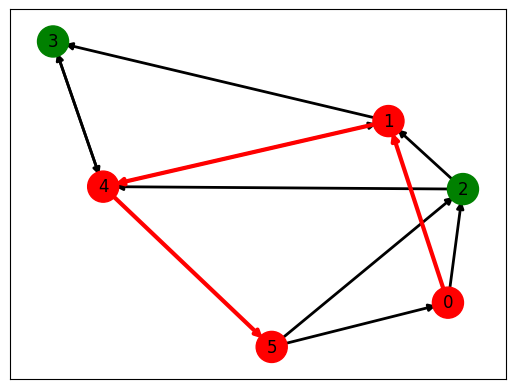

In [14]:
red_node = set(path)                                                # вершины маршрута
red_edges = [ (path[i],path[i+1]) for i in range(len(path)-1) ]     # рёбра маршрута

# разделение по цветам вершин и рёбер
node_colours = ['g' if not node in red_node else 'red' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# построение графа
#p = nx.spring_layout(G)

p = {0: [ 0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794,  1.        ],
 4: [-0.44016179,  0.07245783],
 5: [-0.03856228, -0.95176763]}

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color = node_colours, node_size = 500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=black_edges, width =2.0, edge_color='k', arrows=True)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width =3.0, edge_color='r', arrows=True)

plt.show()

In [15]:
# координаты вершин на рисунке
p

{0: [0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794, 1.0],
 4: [-0.44016179, 0.07245783],
 5: [-0.03856228, -0.95176763]}

# Упражнение 1

Две вершины (v и u) ориентированного графа называют сильно связными, если существует путь из v в u и существует путь из u в v. Ориентированный граф называется сильно связным, если любые две его вершины сильно связны.

Напишите функцию, использующую модифицированый алгоритм поиска в глубину (алгоритм Косарайю) для определения компонент сильой связности.

Алгоритм:

1. Инвертируем дуги исходного ориентированного графа.
2. Запускаем поиск в глубину на этом обращённом графе, запоминая, в каком порядке выходили из вершин.
3. Запускаем поиск в глубину на исходном графе, в очередной раз выбирая не посещённую вершину с максимальным номером в векторе, полученном в п.2.

Полученные из п.3 деревья и являются сильно связными компонентами.

Найдите и постройте графически с помощью этой функции компоенты сильной связности графа:

In [16]:
pos2 = {0: {1, 2},
        1: {3, 4},
        2: {1, 4},
        3: {4},
        4: {1, 3, 5},
        5: {0, 2},
        6: {3, 0, 5},
        7: {2, 1},
        8: {0, 7, 3},
        9: {2, 4, 6, 8}}

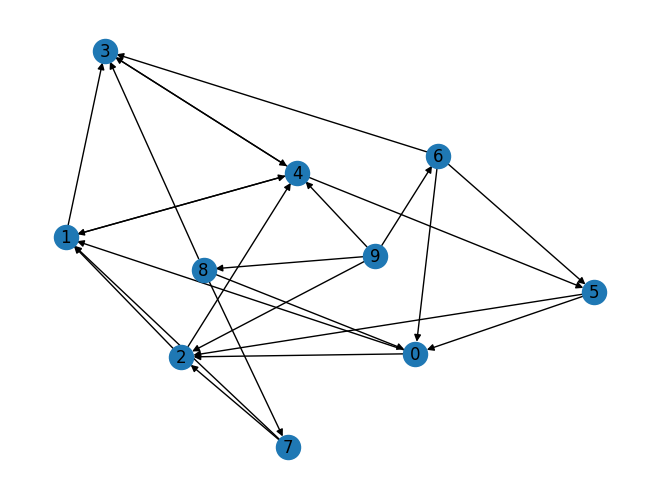

<Figure size 640x480 with 0 Axes>

In [17]:
N = 10
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos2[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G,with_labels=True)

pylab.figure ()
plt.show()

# Пример 2. Ход конём

Создадим две строки, комбинация которых даст нам обозночения всех клеток шахматного поля:

In [26]:
letters = 'abcdefgh'
numbers = '12345678'

Создадим структуру типа слоарь для хранения графа в формате множества смежности:

In [27]:
graph = dict()
graph

{}

Заполним имена вершин графа:

In [28]:
for l in letters:
    for n in numbers:
        graph[l+n] = set()
graph

{'a1': set(),
 'a2': set(),
 'a3': set(),
 'a4': set(),
 'a5': set(),
 'a6': set(),
 'a7': set(),
 'a8': set(),
 'b1': set(),
 'b2': set(),
 'b3': set(),
 'b4': set(),
 'b5': set(),
 'b6': set(),
 'b7': set(),
 'b8': set(),
 'c1': set(),
 'c2': set(),
 'c3': set(),
 'c4': set(),
 'c5': set(),
 'c6': set(),
 'c7': set(),
 'c8': set(),
 'd1': set(),
 'd2': set(),
 'd3': set(),
 'd4': set(),
 'd5': set(),
 'd6': set(),
 'd7': set(),
 'd8': set(),
 'e1': set(),
 'e2': set(),
 'e3': set(),
 'e4': set(),
 'e5': set(),
 'e6': set(),
 'e7': set(),
 'e8': set(),
 'f1': set(),
 'f2': set(),
 'f3': set(),
 'f4': set(),
 'f5': set(),
 'f6': set(),
 'f7': set(),
 'f8': set(),
 'g1': set(),
 'g2': set(),
 'g3': set(),
 'g4': set(),
 'g5': set(),
 'g6': set(),
 'g7': set(),
 'g8': set(),
 'h1': set(),
 'h2': set(),
 'h3': set(),
 'h4': set(),
 'h5': set(),
 'h6': set(),
 'h7': set(),
 'h8': set()}

Заполним множества смежности:

In [29]:
def add_edge(graph, v1, v2):
    graph[v1].add(v2)
    graph[v2].add(v1)              

In [30]:
for i in range(8):
    for j in range(8):
        v1 = letters[i]+numbers[j]
        v2 = ''
        if 0<=i+2<8 and 0<=j+1<8:
            v2 = letters[i+2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i-2<8 and 0<=j+1<8:
            v2 = letters[i-2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i+1<8 and 0<=j+2<8:
            v2 = letters[i+1]+numbers[j+2]
            add_edge(graph, v1, v2)            
            
        if 0<=i-1<8 and 0<=j+2<8:
            v2 = letters[i-1]+numbers[j+2]
            add_edge(graph, v1, v2)  

In [31]:
graph

{'a1': {'b3', 'c2'},
 'a2': {'b4', 'c1', 'c3'},
 'a3': {'b1', 'b5', 'c2', 'c4'},
 'a4': {'b2', 'b6', 'c3', 'c5'},
 'a5': {'b3', 'b7', 'c4', 'c6'},
 'a6': {'b4', 'b8', 'c5', 'c7'},
 'a7': {'b5', 'c6', 'c8'},
 'a8': {'b6', 'c7'},
 'b1': {'a3', 'c3', 'd2'},
 'b2': {'a4', 'c4', 'd1', 'd3'},
 'b3': {'a1', 'a5', 'c1', 'c5', 'd2', 'd4'},
 'b4': {'a2', 'a6', 'c2', 'c6', 'd3', 'd5'},
 'b5': {'a3', 'a7', 'c3', 'c7', 'd4', 'd6'},
 'b6': {'a4', 'a8', 'c4', 'c8', 'd5', 'd7'},
 'b7': {'a5', 'c5', 'd6', 'd8'},
 'b8': {'a6', 'c6', 'd7'},
 'c1': {'a2', 'b3', 'd3', 'e2'},
 'c2': {'a1', 'a3', 'b4', 'd4', 'e1', 'e3'},
 'c3': {'a2', 'a4', 'b1', 'b5', 'd1', 'd5', 'e2', 'e4'},
 'c4': {'a3', 'a5', 'b2', 'b6', 'd2', 'd6', 'e3', 'e5'},
 'c5': {'a4', 'a6', 'b3', 'b7', 'd3', 'd7', 'e4', 'e6'},
 'c6': {'a5', 'a7', 'b4', 'b8', 'd4', 'd8', 'e5', 'e7'},
 'c7': {'a6', 'a8', 'b5', 'd5', 'e6', 'e8'},
 'c8': {'a7', 'b6', 'd6', 'e7'},
 'd1': {'b2', 'c3', 'e3', 'f2'},
 'd2': {'b1', 'b3', 'c4', 'e4', 'f1', 'f3'},
 'd3': {'b

Проведём сканирование графа в ширину:

In [61]:
start = 'd4'
end = 'f7'

level, parents = bfs(graph, start)

И прлучим маршрут коня:

In [62]:
PATH(end, parents)

['d4', 'f3', 'e5', 'f7']

# Упражнение 2.

Нарисуйте граф соответствующий маршрутам коня по шахматной доске и отметте на нём найденный маршрут.

# Упражнение 3. Раскраски.

Рассмотрим граф G(V,E), имеющий V вершин и E ребер. Раскраской графа G называется окрашивание вершин графа G такое, что никакие две смежные вершины не имеют одинаковый цвет. Хроматическое число графа X(G) - это наименьшее число цветов, которое используется для раскраски графа. Известен жадный алгоритм раскраски графа.

Жадный алгоритм последовательного раскрашивания:

Входные данные: граф G (V,E)
Выходные данные: массив c[v] раскрашенных вершин
1. Для всех вершин определить множество А ={1,2,3..,n} всех цветов.
2. Выбрать стартовую вершину (с которой начинаем алгоритм). Раскрасить вершину в цвет color. Вычеркнуть этот цвет из множества цветов всех вершин, смежных со стартовой.
3. Выбрать не раскрашенную вершину v
4. Раскрасить выбранную вершину в минимально возможный цвет из множества А. Вычеркнуть этот цвет из множества цветов всех вершин, смежных с вершиной v.
5. Проделать шаг 3, шаг 4 для всех нераскрашенных вершин графа.

На основе этого алгоритма раскрасьте граф из задачи про коня.

# Домашнее задание (базовое):

# Задание 1. Алгоритм Дейкстры

Напишите функцию реализуущую алгоритм Дейкстры.

In [35]:
def dijkstra(graph, start, stop = False):
    distances = {v: float('infinity') for v in graph}
    distances[start] = 0
    queue = [(0, start)]
    processed = set()
    parents = {v: None for v in graph}

    while queue:
        current_distance, current_vertex = min(queue, key=lambda x: x[0])
        processed.add(current_vertex)
        queue.remove(min(queue, key=lambda x: x[0]))

        # Обрабатываем только вершину с наименьшим расстоянием
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Рассматриваем этот новый путь только в том случае, если он лучше любого пути, который мы нашли до сих пор
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                queue.append((distance, neighbor))
                parents[neighbor] = current_vertex

        if stop and all(n in processed for n in graph[stop].keys()):
            return distances[stop], parents

        

    return distances, parents

In [37]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

# Задание 2. 

Сгенерируйте случайный взвешенный граф. И определите на нём маршрут минимальной длины с помощью алгоритма Дейкстры.

In [61]:
graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'C': 1},
    'C': {'A': 3, 'B': 2}
}

a, b = dijkstra(graph, 'A')
path = PATH('C', b)
path2 = set()

for i in range(len(path)-1):
    path2.add((path[i], path[i+1]))



# Задание 3.

Проиллюстрируйте работу одного из алгоритмов (поиска в ширину или глубину, Дейкстры) с помощью визуализации действий с графом на каждой итерации с помощью библиотек networkx и matplotlib, аналогично примеру 1.

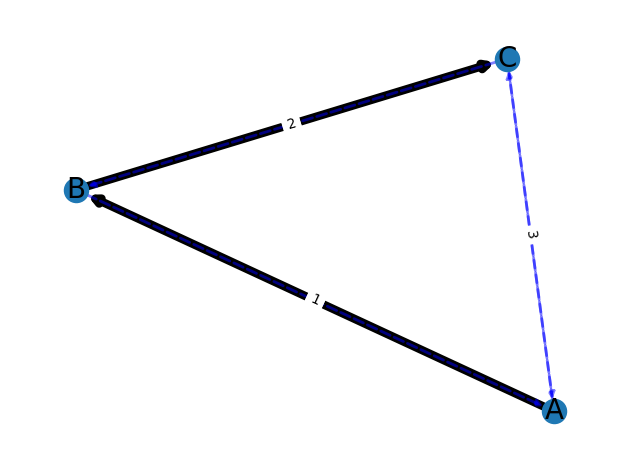

In [64]:
import matplotlib.pyplot as plt
import networkx as nx

graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'C': 1},
    'C': {'A': 3, 'B': 2}
}


G = nx.DiGraph()

G.add_edge("A", "B", weight=1)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "A", weight=3)
G.add_edge("C", "B", weight=2)
G.add_edge("B", "A", weight=1)
G.add_edge("B", "C", weight=1)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if (u, v) in path2]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if (u, v) not in path2]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Задание 4. В библиотеке.

Используйте какой-нибудь интересный алгоритм из https://networkx.github.io/documentation/stable/reference/algorithms/index.html

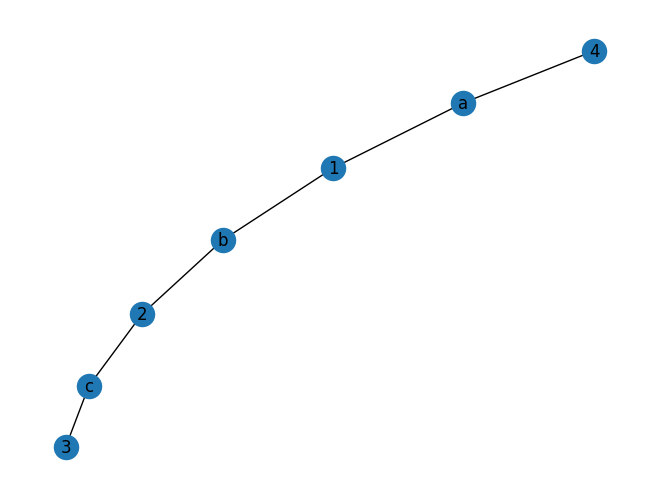

<Figure size 640x480 with 0 Axes>

In [67]:
from networkx.algorithms import bipartite

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

nx.draw(B,with_labels=True)

pylab.figure ()
plt.show()

# Домашнее задание (дополнительное):

# Задание. Картинка.

Существует много способов кодирования изображений. Рассмотрим два из них. Пусть изображения состоят только из чёрных и белых пикселей. В каждом из них есть хотя бы один чёрный пиксель, и все чёрные пиксели составляют одну связанную область (соединены сторонами друг с другом). 

Оба представления описывают расположение только чёрных пикселей.

Первое представление задаёт в первой строке количество чёрных пикселей, а в следующих строках — координаты каждого чёрного пикселя. Пиксели перечислены в порядке возрастания X-координат. В случае равенства X-координат они перечислены в порядке возрастания Y-координат. Изображение, показанное на рисунке, кодируется следующим образом:

6

2 3

2 4

3 3

3 4

4 2

4 3

Второе представление задаёт в первой строке координаты самого нижнего из самых левых чёрных пикселей. Каждая из следующих строк содержит описание соседей одного из пикселей. Сначала описываются соседи самого нижнего из самых левых пикселей, затем описываются соседи его первого соседа (если он существует), затем соседи его второго соседа (если он также существует). Когда все непосредственные соседи описаны, следует описание соседей первого соседа, затем описание соседей второго соседа и так далее.

Каждая строка описания содержит не более одной буквы для каждого из соседей: R для правого, T для верхнего, L для левого, B для нижнего. Если сосед уже был описан, он не включается в строку описания, если ещё не был — включается. Каждый пиксель описывается одной строкой. Соседи перечисляются в порядке против часовой стрелки, начиная с правого. Каждая строка описания, кроме последней, заканчивается запятой. Последняя строка заканчивается точкой. Изображение, показанное на рисунке, кодируется следующим образом:

2 3

RT,

RT,

,

B,

,

.

Закодированное таким образом изображение имеет следующий вид. 

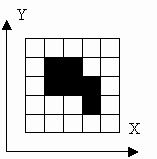

In [1]:
# Так можно добавлять картинки

from IPython.display import Image              # вызов из библиотеки определённой функции
Image("Кодирование изображений (Графы).png")   # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

Напишите программу выполняющую изменение кодировки из первого формата во второй и выводящую соответствующее изображение на экран. Начальное и переконвертированное изображение должно храниться в файлах с соответствующими размерностями: .format1 и .format2.

In [141]:
with open('test.format1.txt') as f:
    n = int(f.readline())
    a = [tuple(map(int, i.split())) for i in f.readlines()]

a_set = set(a)
neighbors = set()
neighbors.add(a[0])

poss = {}

for i in a:
    poss[i] = []
    a, b = i
    if (a+1, b) in a_set:
        poss[i].append((a+1, b, 'R'))
    if (a, b+1) in a_set:
        poss[i].append((a, b+1, 'T'))
    if (a-1, b) in a_set:
        poss[i].append((a-1, b, 'L'))
    if (a, b-1) in a_set:
        poss[i].append((a, b-1, 'B'))

In [142]:
def res(graph, s):
    neigh = set()
    neigh.add(s)
    queue = [s]
    ans = []
    ans.append(' '.join(list(map(str, s))))          
    while queue:                         
        v = queue.pop(0)
        c_2 = 0
        ans_cur = ''          
        for w in graph[v[:2]]:
            if w[:2] not in neigh:           
                queue.append(w)
                ans_cur += w[2]
                neigh.add(w[:2])
                c_2 += 1
        if c_2 == 0:
            ans.append("")
        else:
            ans.append(ans_cur)

    return ans

In [143]:
n = res(poss, (2, 3))

In [144]:
with open('test.format2.txt', 'w') as f:
    ans = ',\n'.join(n)
    f.write(ans)
    f.write('.')

# Задание. Алгоритм Форда - Беллмана

Напишите функцию реализуущую алгоритм Форда - Беллмана
(https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B5%D0%BB%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BE%D1%80%D0%B4%D0%B0).

In [189]:
def BellmanFord(graph, start): 

	dist = {v: float('infinity') for v in graph}
	dist[start] = 0
	parents = {v: None for v in graph}

	for n in range(len(graph)):
		for i in graph:
			for neighbor, w in graph[i].items():
				if dist[i] != float("Inf") and dist[i] + w < dist[neighbor]: 
					dist[neighbor] = dist[i] + w
					parents[neighbor] = i


	for i in graph:
		for neighbor, w in graph[i].items():
			if dist[i] != float("Inf") and dist[i] + w < dist[neighbor]: 
					print ("Существует отрицательный цикл")
						
	return  dist, parents

In [218]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

In [190]:
    graph = {
    'A': {'B': 1, 'C': 3},
    'B': {'A': 1, 'C': 1},
    'C': {'A': 3, 'B': 2}
}
BellmanFord(graph, 'A')

({'A': 0, 'B': 1, 'C': 2}, {'A': None, 'B': 'A', 'C': 'B'})

# Задание. Лабирит.

Найдите выход из лабирита с помощью различных алгоритмов и сравите их. (Взвести рёбра пропорционально их длине.)

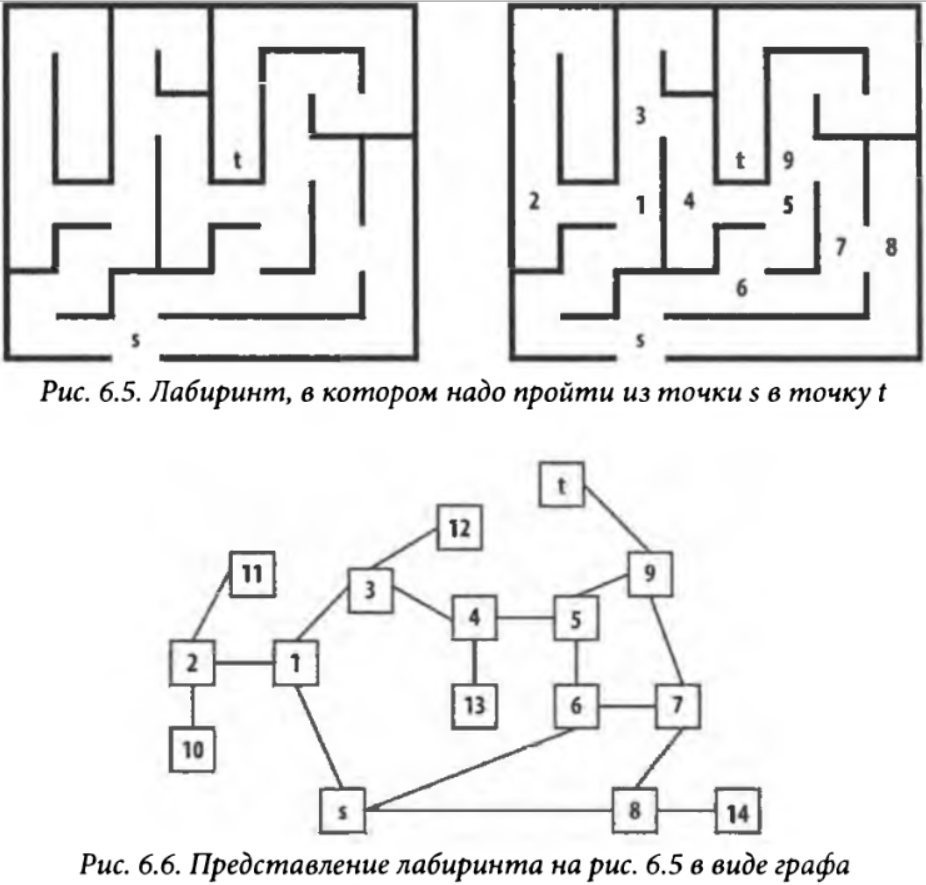

In [2]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Лабиринт.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [233]:
def dijkstra(graph, start, stop = False):
    distances = {v: float('infinity') for v in graph}
    distances[start] = 0
    queue = [(0, start)]
    parents = {v: None for v in graph}

    while queue:
        current_distance, current_vertex = min(queue, key=lambda x: x[0])
        queue.remove(min(queue, key=lambda x: x[0]))

        # Обрабатываем только вершину с наименьшим расстоянием
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Рассматриваем этот новый путь только в том случае, если он лучше любого пути, который мы нашли до сих пор
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                queue.append((distance, neighbor))
                parents[neighbor] = current_vertex

    if stop:
        return distances[stop], PATH(stop, parents)

    return distances, parents


def BellmanFord(graph, start, stop=False): 

	dist = {v: float('infinity') for v in graph}
	dist[start] = 0
	parents = {v: None for v in graph}

	for n in range(len(graph)):
		for i in graph:
			for neighbor, w in graph[i].items():
				if dist[i] != float("Inf") and dist[i] + w < dist[neighbor]: 
					dist[neighbor] = dist[i] + w
					parents[neighbor] = i

	for i in graph:
		for neighbor, w in graph[i].items():
			if dist[i] != float("Inf") and dist[i] + w < dist[neighbor]: 
					print("Существует отрицательный цикл")
	if stop:
		return dist[stop], PATH(stop, parents)
	return dist, parents

In [234]:
    graph = {
    't': {9: 9},
    9: {5: 5, 7: 7},
    5: {4: 4, 6: 6},
    7: {6: 6, 8: 8},
    8: {14: 14, 's': 8},
    4: {3: 3, 13: 13},
    3: {1: 1, 12: 12},
    1: {2: 2, 's': 1},
    2: {10: 10, 11: 11},
    6: {'s': 6},
    14: {},
    13: {},
    11: {},
    10: {},
    12: {},
    's': {}
}
#получаются совершенно аналогичные ответы, значит всё работает правильно)
print(dijkstra(graph, 't', 's'))
print(BellmanFord(graph, 't', 's'))


(23, ['t', 9, 5, 4, 3, 1, 's'])
(23, ['t', 9, 5, 4, 3, 1, 's'])


# Задание. Электроскутер.

У Еремея есть электросамокат — и он хочет доехать от дома до института, затратив как можно меньше энергии. Весь город расположен на холмистой местности и разделён на квадраты. Для каждого перекрёстка известна его высота в метрах над уровнем моря. Если ехать от перекрёстка с большей высотой до смежного с ним перекрёстка с меньшей высотой, то электроэнергию можно аккумулировать (заряжая скутор), а если наоборот, то расход энергии равен разнице высот между перекрёстками.
Помогите Еремею спланировать маршрут, чтобы он затратил наименьшее возможное количество энергии от дома до института и определите это количество.

In [ ]:
#алгортм поиска в графе с отрицательными весами

def BellmanFord(graph, start): 

	dist = {v: float('infinity') for v in graph}
	dist[start] = 0
	parents = {v: None for v in graph}

	for n in range(len(graph)):
		for i in graph:
			for neighbor, w in graph[i].items():
				if dist[i] != float("Inf") and dist[i] + w < dist[neighbor]: 
					dist[neighbor] = dist[i] + w
					parents[neighbor] = i


	for i in graph:
		for neighbor, w in graph[i].items():
			if dist[i] != float("Inf") and dist[i] + w < dist[neighbor]: 
					print ("Существует отрицательный цикл")
						
	return  dist, parents